In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Pomiar prądu

In [18]:
curr_1_2k = pd.read_csv('..\CURR_TEST\logs_(1,2k).log')
curr_220 = pd.read_csv('..\CURR_TEST\logs_(220).log')
curr_330 = pd.read_csv('..\CURR_TEST\logs_(330).log')
curr_1_2k.head()

,time,voltage
0,257,3.0
1,257,3.0
2,258,3.0
3,258,3.0
4,258,3.0


In [19]:
print(len(curr_1_2k['time']))
print(len(curr_220['time']))
print(len(curr_330['time']))

4750
2244
4604


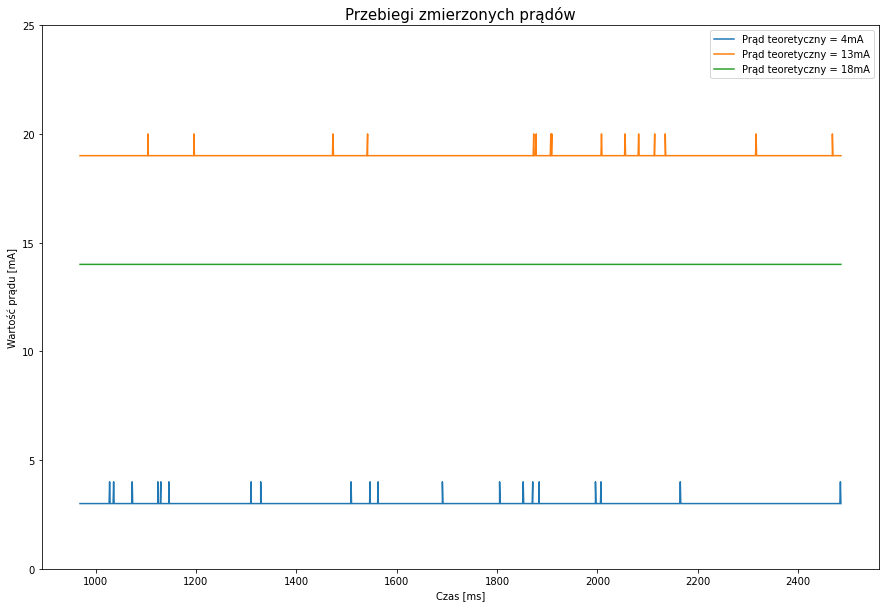

In [20]:
plt.figure(figsize=(15,10))
plt.plot(curr_220['time'], curr_1_2k['voltage'][0:len(curr_220['time'])],
        curr_220['time'], curr_220['voltage'],
        curr_220['time'], curr_330['voltage'][0:len(curr_220['time'])])
plt.title('Przebiegi zmierzonych prądów', fontsize=15)
plt.ylim([0,25])
plt.xlabel('Czas [ms]', fontsize=10)
plt.ylabel('Wartość prądu [mA]', fontsize=10)
plt.legend(['Prąd teoretyczny = 4mA', 'Prąd teoretyczny = 13mA', 'Prąd teoretyczny = 18mA'])
plt.savefig('../CURR_TEST/plot/current_plot.png')

# Pomiar prędkości

In [21]:
speed = pd.read_csv('..\ENC_TEST\logs_enc.csv')
speed.head()

,time,speed_sensor
0,1353,0.0
1,1353,0.0
2,1354,0.0
3,1354,0.0
4,1355,0.0


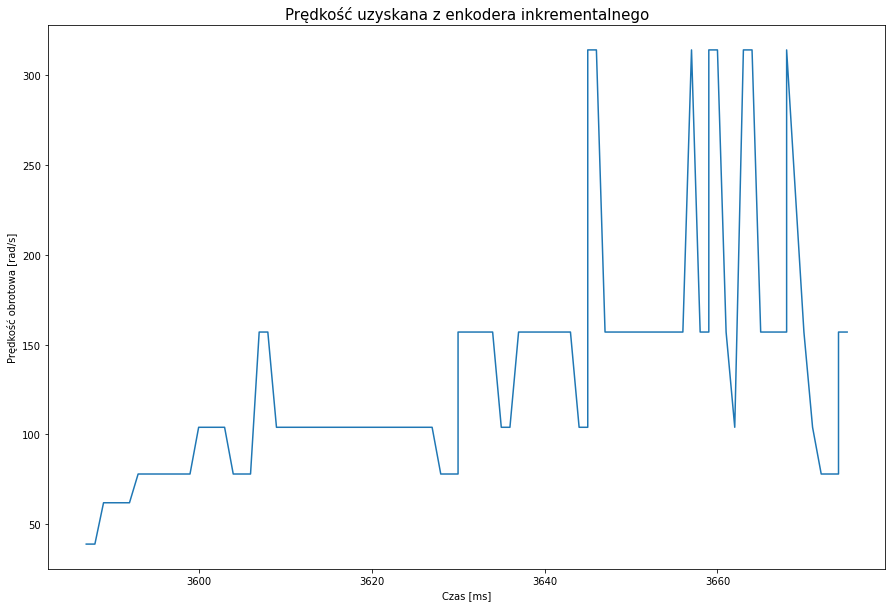

In [22]:
plt.figure(figsize=(15,10))
plt.plot(speed['time'][3200:3320], speed['speed_sensor'][3200:3320])
plt.title('Prędkość uzyskana z enkodera inkrementalnego', fontsize=15)
plt.ylabel('Prędkość obrotowa [rad/s]', fontsize=10)
plt.xlabel('Czas [ms]', fontsize=10)
plt.savefig('../ENC_TEST/plot/speed_plot.png')

# Komunikacja I2C

In [23]:
i2c_data = pd.read_csv('..\I2C_TEST\logs_i2c.log')
i2c_data.head()

,time,i2c_mess
0,421,8398.0
1,422,7277.0
2,423,6176.0
3,425,5080.0
4,427,3974.0


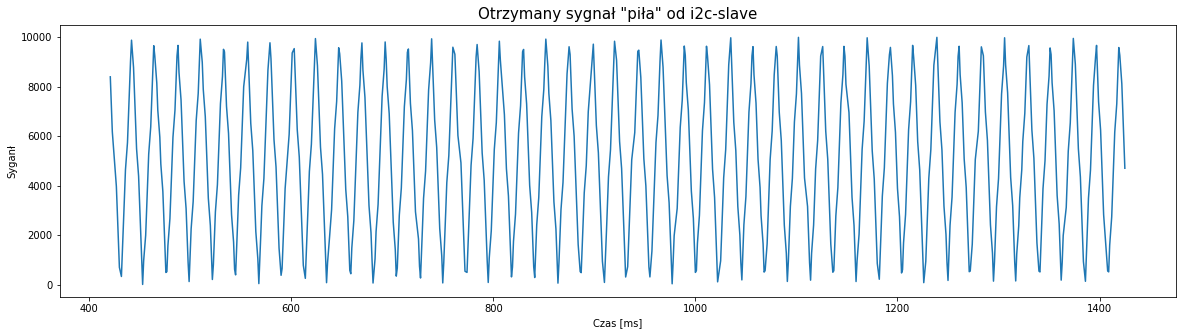

In [24]:
plt.figure(figsize=(20,5))
plt.plot(i2c_data['time'][:800], i2c_data['i2c_mess'][:800])
plt.title('Otrzymany sygnał "piła" od i2c-slave', fontsize=15)
plt.xlabel('Czas [ms]', fontsize=10)
plt.ylabel('Syganł', fontsize=10)
plt.savefig('../I2C_TEST/plot/i2c_plot.png')

# Pomiar napiecia

In [25]:
volt = pd.read_csv('..\VOLT_TEST\log_volt.csv')
volt.head()

,time,speed_sensor
0,2118,4995
1,2118,4995
2,2119,4975
3,2120,4995
4,2120,4995


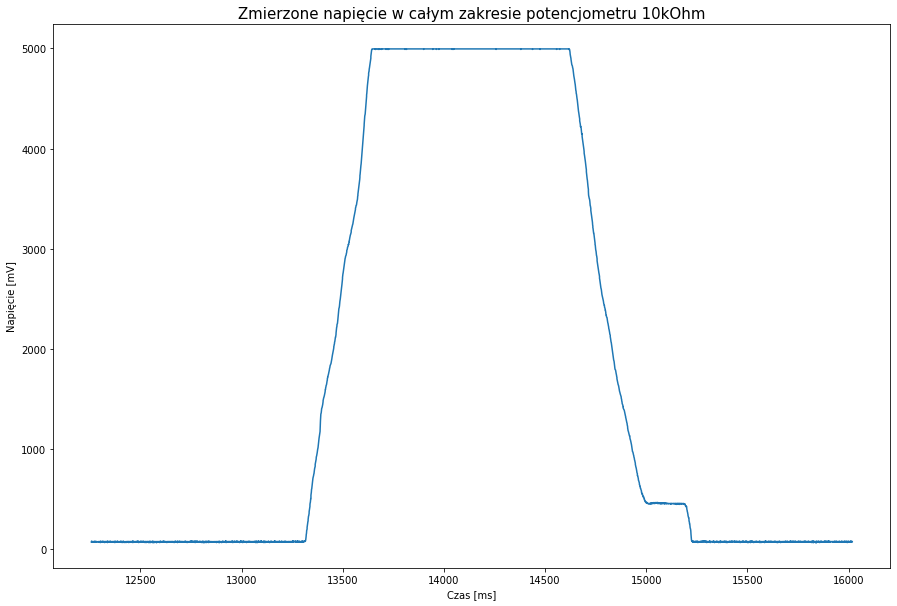

In [26]:
plt.figure(figsize=(15,10))
plt.plot(volt['time'][12500:17000], volt['speed_sensor'][12500:17000])
plt.title('Zmierzone napięcie w całym zakresie potencjometru 10kOhm', fontsize=15)
plt.xlabel('Czas [ms]', fontsize=10)
plt.ylabel('Napięcie [mV]', fontsize=10)
plt.savefig('../VOLT_TEST/plot/volt_plot.png')

# Generacja sybału PWM

In [27]:
ch1_sig = pd.read_csv('..\PWM_TEST\ch1.csv')[3:]
ch2_sig = pd.read_csv('..\PWM_TEST\ch2.csv')[3:]
ch1_sig.head()       
        

,#CLOCK=0.001000000
3,0.0000
4,0.0627
5,0.0627
6,0.0627
7,0.0627


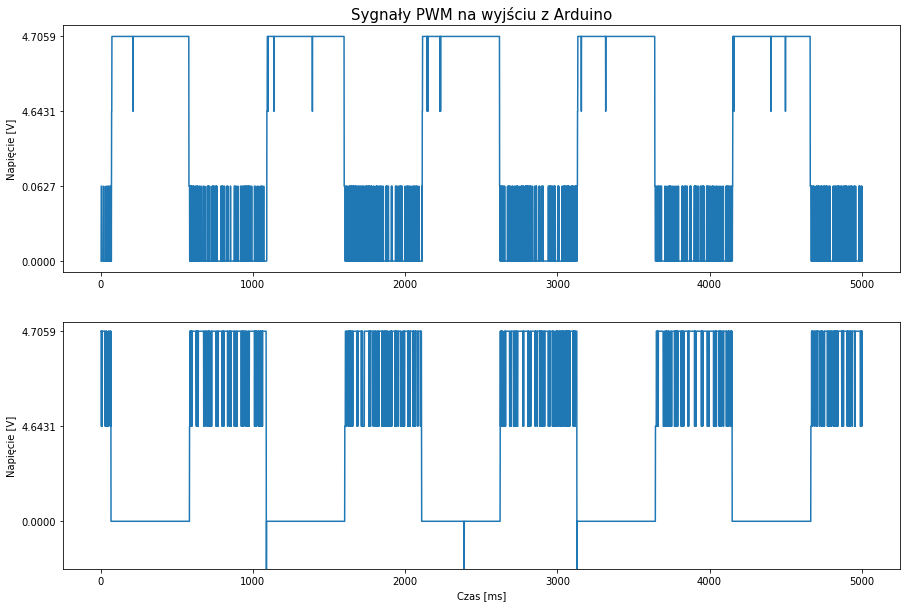

In [58]:
fig, axs = plt.subplots(2, figsize=(15,10))
axs[0].plot(ch1_sig.index[:5000], ch1_sig['#CLOCK=0.001000000'][0:5000])
axs[1].plot(ch2_sig.index[:5000], ch2_sig['#CLOCK=0.001000000'][0:5000])
axs[1].set_ylim(2.5,-0.1)

axs[0].set_title('Sygnały PWM na wyjściu z Arduino', fontsize=15)
axs[1].set_xlabel('Czas [ms]')
axs[0].set_ylabel('Napięcie [V]')
axs[1].set_ylabel('Napięcie [V]')
fig.savefig('../PWM_TEST/plot/PWM_plot.png')